In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd

In [89]:
chargingdf = pd.read_csv("public-charging-stations-in-hawaii-1.csv")

print(chargingdf.head())

   Island                                            Address  Zip Code  \
0  Island             Street Adress\nCity, Hawaii Zip Code\n  Zip Code   
1    Oahu  2295 North King Street\nHonolulu, Hawaii 96819...     96819   
2    Oahu  100 Holomoana St.\nHonolulu, Hawaii 96815\n(21...     96815   
3    Oahu  3221 Waialae Ave\nHonolulu, Hawaii 96816\n(21....     96816   
4    Oahu  4450 Kapolei Parkway\nKapolei, Hawaii 96707\n(...     96707   

     Facility              Parking Lot  \
0    Facility              Parking Lot   
1  Commercial          New City Nissan   
2       Hotel      Hawaii Prince Hotel   
3  Commercial  Kaimuki Shopping Center   
4  Commercial          Kapolei Commons   

                                    Charger Location  \
0                                   Charger Location   
1  3 charging stalls are located in front right o...   
2                   In level E of the parking garage   
3                                   Outdoor open lot   
4            In the fr

In [90]:
# Keep only the needed columns
chargingdf = chargingdf[['Island', 'Facility', 'Number of Chargers', 'Number of Ports',]]

# Display the first few rows of the cleaned DataFrame to verify the changes
print(chargingdf.head())

   Island    Facility   Number of Chargers    Number of Ports
0  Island    Facility  Number of Chargers*  Number of Ports**
1    Oahu  Commercial                    3                  3
2    Oahu       Hotel                    4                  4
3    Oahu  Commercial                    1                  2
4    Oahu  Commercial                    2                  2


In [91]:
# Rename the columns for better clarity
chargingdf.columns = ['Island', 'Facility', 'Number of Chargers', 'Number of Ports']

# Remove any leading/trailing whitespaces from column values
chargingdf = chargingdf.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Display the first few rows of the cleaned DataFrame to verify the changes
print(chargingdf.head())

   Island    Facility   Number of Chargers    Number of Ports
0  Island    Facility  Number of Chargers*  Number of Ports**
1    Oahu  Commercial                    3                  3
2    Oahu       Hotel                    4                  4
3    Oahu  Commercial                    1                  2
4    Oahu  Commercial                    2                  2


C:\Users\carlm\AppData\Local\Temp\ipykernel_4068\311262531.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chargingdf = chargingdf.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [92]:
# Remove the first row
chargingdf = chargingdf.drop(0)

# Reset the index
chargingdf.reset_index(drop=True, inplace=True)

# Display the cleaned dataframe
print(chargingdf)


    Island    Facility Number of Chargers Number of Ports
0     Oahu  Commercial                  3               3
1     Oahu       Hotel                  4               4
2     Oahu  Commercial                  1               2
3     Oahu  Commercial                  2               2
4     Oahu       Hotel                  2               2
..     ...         ...                ...             ...
110   Oahu       Hotel                  2               2
111  Kauai       Hotel                  1               2
112   Maui       Hotel                  1               2
113   Maui  Commercial                  1               1
114   Oahu  Commercial                  3               3

[115 rows x 4 columns]


In [93]:
missing_values = chargingdf.isnull().sum()
print(missing_values)


Island                0
Facility              0
Number of Chargers    1
Number of Ports       1
dtype: int64


In [94]:
missing_rows = chargingdf[chargingdf.isnull().any(axis=1)]
print(missing_rows)

   Island    Facility Number of Chargers Number of Ports
46   Maui  Commercial                NaN             NaN


In [95]:
chargingdf = chargingdf.dropna()

chargingdf.reset_index(drop=True, inplace=True)

In [96]:
missing_values = chargingdf.isnull().sum()
print(missing_values)


Island                0
Facility              0
Number of Chargers    0
Number of Ports       0
dtype: int64


In [123]:
# Replace 'Oahu' with 'Honolulu' in the 'Island' column of the charging data
chargingdf['Island'] = chargingdf['Island'].replace('Oahu', 'Honolulu')


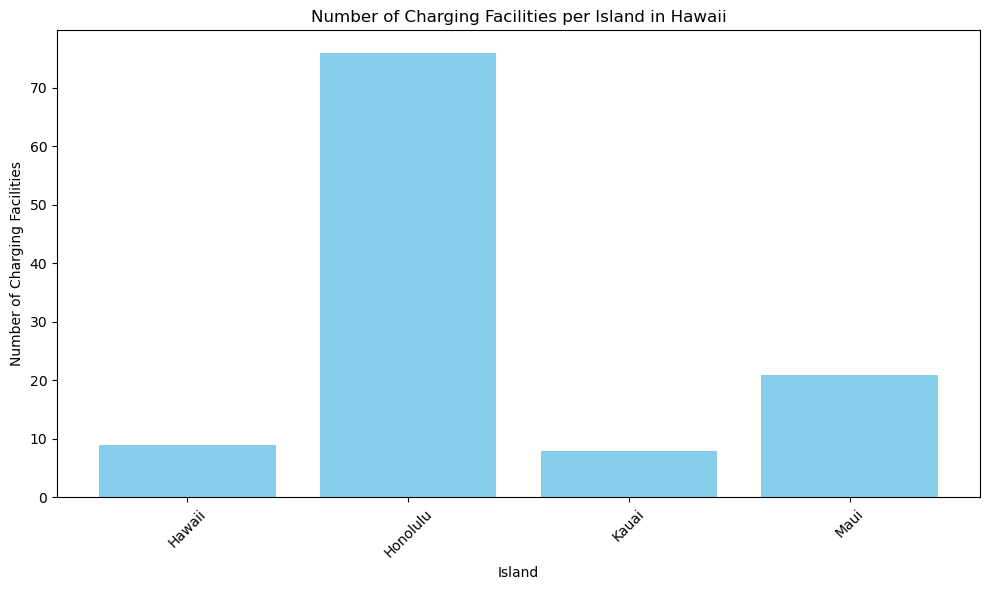

In [124]:
# Calculate the number of charging facilities per island
charging_per_island = chargingdf.groupby('Island').size().reset_index(name='Number of Charging Facilities')

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(charging_per_island['Island'], charging_per_island['Number of Charging Facilities'], color='skyblue')

# Set plot title and labels
plt.title('Number of Charging Facilities per Island in Hawaii')
plt.xlabel('Island')
plt.ylabel('Number of Charging Facilities')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [129]:
# Load the GADM data
gadm_data = gpd.read_file("gadm41_USA_2.json")

In [130]:
hawaii_boundaries = gadm_data[gadm_data['NAME_1'] == 'Hawaii']

In [133]:
# Split each string into individual digits and sum them up
chargers_per_island['Total Chargers'] = chargers_per_island['Number of Chargers'].apply(lambda x: sum(map(int, str(x))))

# Replace 'Oahu' with 'Honolulu' in the 'Island' column of chargers_per_island DataFrame
chargers_per_island['Island'] = chargers_per_island['Island'].replace('Oahu', 'Honolulu')

# Display the updated DataFrame
print(chargers_per_island)


     Island                                 Number of Chargers  Total Chargers
0    Hawaii                                          321222422              20
1     Kauai                                           32222331              18
2      Maui                              121111121121231222211              31
3  Honolulu  3412212224111221121244234121424222211412212222...             152


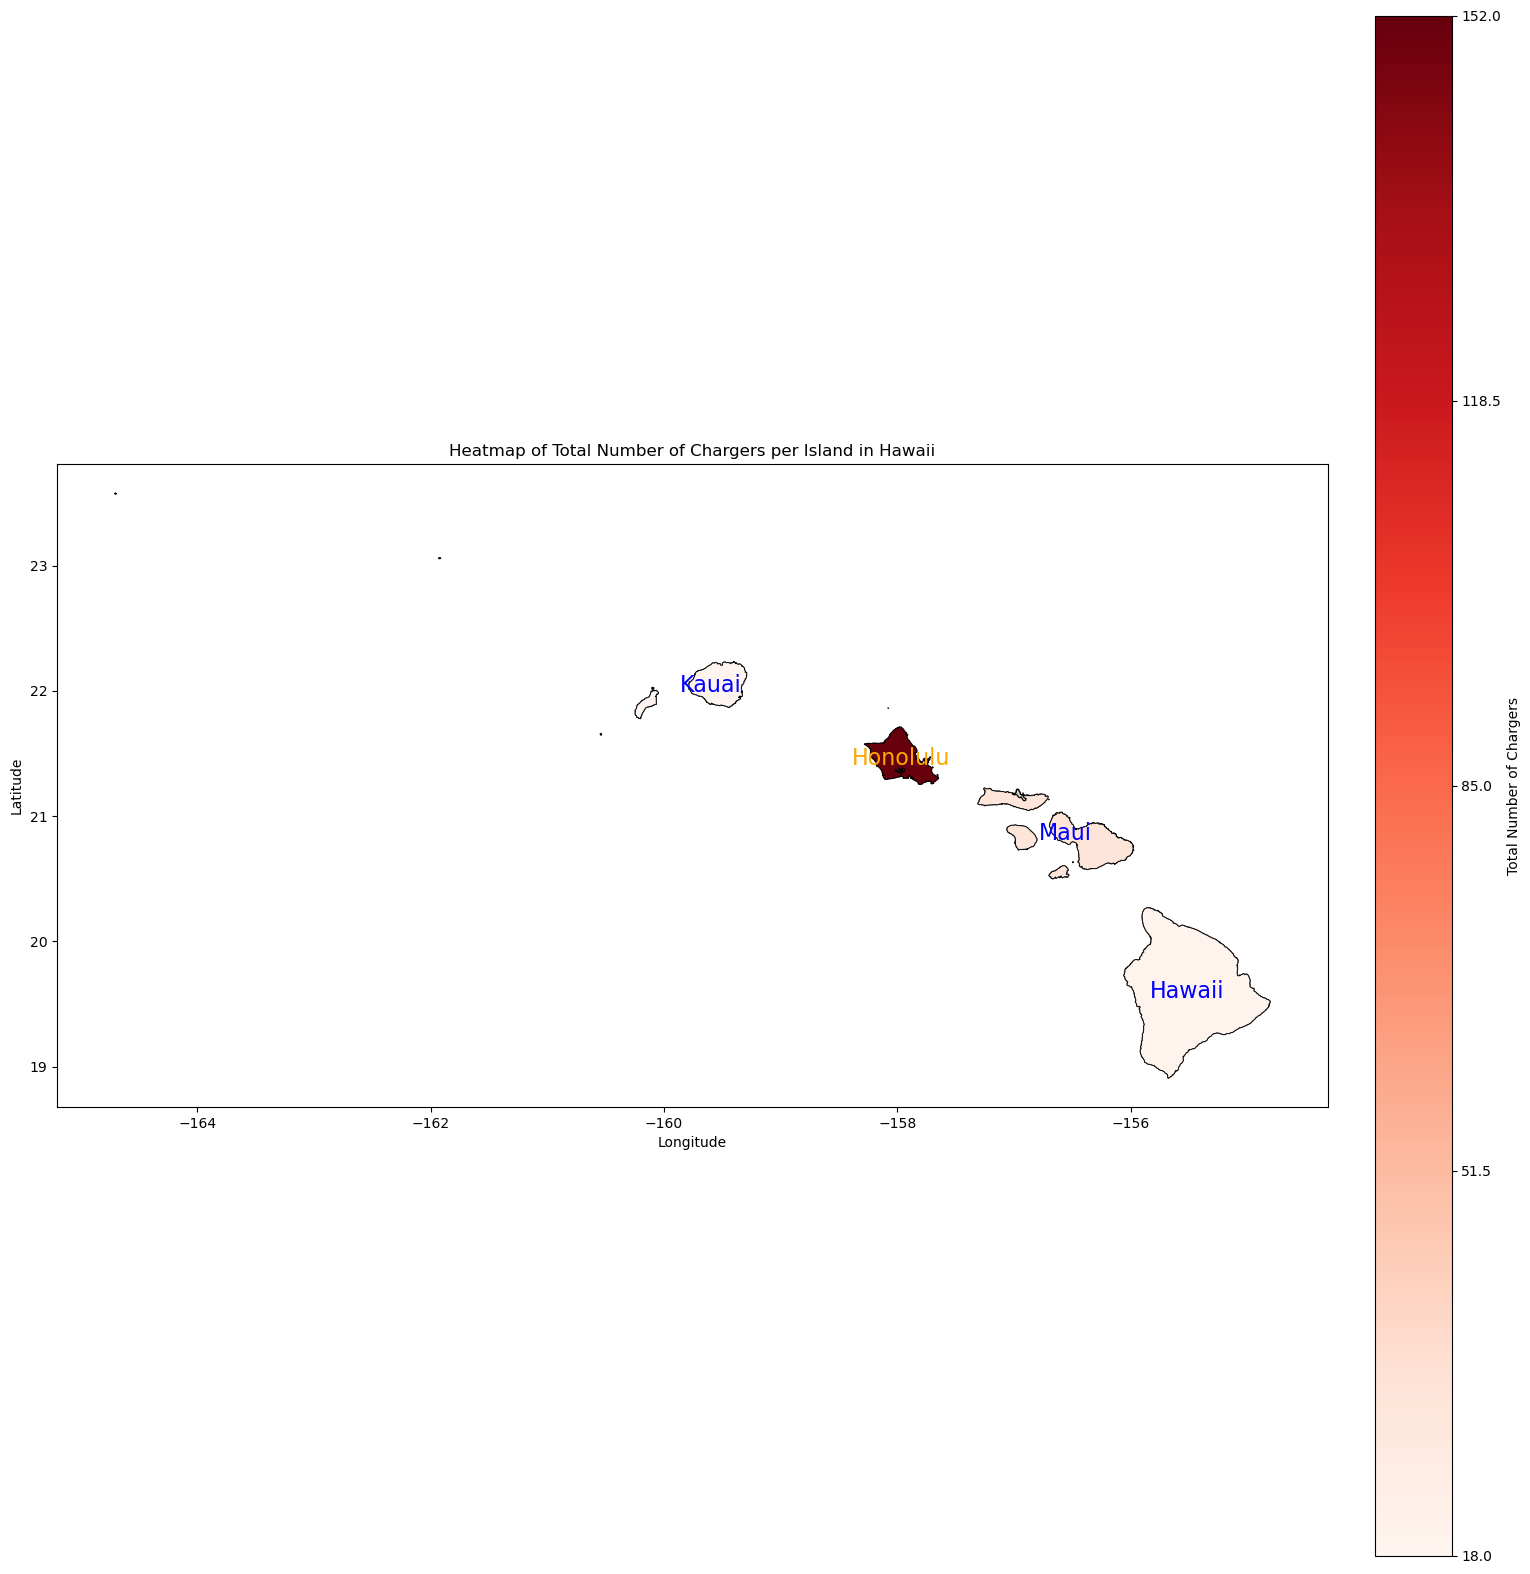

In [166]:
import numpy as np

# Plot GADM boundaries for Hawaii without legend
fig, ax = plt.subplots(figsize=(20, 20))
hawaii_boundaries.plot(ax=ax, color='lightgrey', edgecolor='black', legend=False)

# Merge charging data with GADM data
merged_data = hawaii_boundaries.merge(chargers_per_island, left_on='NAME_2', right_on='Island')

# Determine vmin and vmax for the color bar
vmin = merged_data['Total Chargers'].min()
vmax = merged_data['Total Chargers'].max()

# Plot the heatmap with the total number of chargers per island
merged_data.plot(column='Total Chargers', cmap='Reds', edgecolor='black', linewidth=0.5, legend=False, ax=ax, vmin=vmin, vmax=vmax)

# Annotate each island with its name in blue color
for idx, row in merged_data.iterrows():
    if row['Island'] == 'Honolulu':
        color = 'orange'
    else:
        color = 'blue'
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['Island'], fontsize=16, ha='center', va='center', color=color)

# Add colorbar, title, and labels
cbar = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical', pad=0.03)
cbar.set_label('Total Number of Chargers')

# Set color bar tick labels to increase incrementally between the lowest and highest values
cbar.set_ticks(np.linspace(vmin, vmax, num=5))

ax.set_title('Heatmap of Total Number of Chargers per Island in Hawaii')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig('Total Number Of Chargers per Island')

# Show plot
plt.show()


In [116]:
print(merged_data.head())


        GID_2 GID_0       COUNTRY     GID_1  NAME_1 NL_NAME_1  NAME_2  \
0  USA.12.1_1   USA  UnitedStates  USA.12_1  Hawaii        NA  Hawaii   
1  USA.12.4_1   USA  UnitedStates  USA.12_1  Hawaii        NA   Kauai   
2  USA.12.5_1   USA  UnitedStates  USA.12_1  Hawaii        NA    Maui   

  VARNAME_2 NL_NAME_2  TYPE_2 ENGTYPE_2 CC_2    HASC_2  \
0        NA        NA  County    County   NA  US.HI.HA   
1        NA        NA  County    County   NA  US.HI.KU   
2        NA        NA  County    County   NA  US.HI.MA   

                                            geometry  Island  \
0  MULTIPOLYGON (((-155.87190 20.08830, -155.8800...  Hawaii   
1  MULTIPOLYGON (((-160.08560 22.00280, -160.0855...   Kauai   
2  MULTIPOLYGON (((-156.49530 20.63000, -156.4976...    Maui   

      Number of Chargers  Total Chargers  
0              321222422              20  
1               32222331              18  
2  121111121121231222211              31  


In [148]:
# Filter GADM data for Hawaii
hawaii_gadm = gadm_data[gadm_data['NAME_1'] == 'Hawaii']

# Display the filtered GADM data
print(hawaii_gadm)

          GID_2 GID_0       COUNTRY     GID_1  NAME_1 NL_NAME_1    NAME_2  \
543  USA.12.1_1   USA  UnitedStates  USA.12_1  Hawaii        NA    Hawaii   
544  USA.12.2_1   USA  UnitedStates  USA.12_1  Hawaii        NA  Honolulu   
545  USA.12.3_1   USA  UnitedStates  USA.12_1  Hawaii        NA   Kalawao   
546  USA.12.4_1   USA  UnitedStates  USA.12_1  Hawaii        NA     Kauai   
547  USA.12.5_1   USA  UnitedStates  USA.12_1  Hawaii        NA      Maui   

    VARNAME_2 NL_NAME_2  TYPE_2 ENGTYPE_2 CC_2    HASC_2  \
543        NA        NA  County    County   NA  US.HI.HA   
544        NA        NA  County    County   NA  US.HI.HO   
545        NA        NA  County    County   NA  US.HI.KL   
546        NA        NA  County    County   NA  US.HI.KU   
547        NA        NA  County    County   NA  US.HI.MA   

                                              geometry  
543  MULTIPOLYGON (((-155.87190 20.08830, -155.8800...  
544  MULTIPOLYGON (((-157.65780 21.32020, -157.6566...  
545  